# **Bike Demand Prediction using Multiple Linear Regression**

## **1. Introduction**
### **1.1. Problem Statement**
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To recover and prepare for post-pandemic demand, the company seeks to understand the factors affecting bike demand in the American market. By identifying significant predictors of demand and analyzing their impact, BoomBikes aims to optimize business strategies, meet customer needs, and gain a competitive edge.

- I am required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## **2. Data Understanding**
### **2.1. Import necessary libraries**

In [608]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

warnings.filterwarnings('ignore')

# Pandas by default doesn't display all the columns in the dataframe
# As we're going to work on a large dataset, the following setting will help read data from all the columns
pd.set_option('display.max_columns', None)

# Disable scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# For some of the columns we may have to see the data from all rows
# Eg: Categorical columns.
pd.set_option('display.max_rows', None)

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 


### **2.2. Data Overview**

In [609]:
# Load the data from day.csv file. 
# Using the read_csv function from the pandas library, we can load the data from the csv to a pandas dataframe.
df = pd.read_csv('Data/day.csv')

# Shape property of the pandas dataframe returns the dimention of the dataframe
# The return value will contain the number of rows and columns in the dataframe
df.shape

# Quick observation
#-------------------
# 1. There are 730 rows and
# 2. There are 16 columns
#-------------------

(730, 16)

In [610]:
# Take a quick look at the first 5 rows of data to get an understanding
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [611]:
df.info()

# Quick observation
#-------------------
# 1. There are no null values across the dataset
# 2. Most of the columns are numeric
#-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [612]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


In [613]:
# Pandas dataframe object offers `nunique` function which give the number of unique elements in each column
df.nunique().sort_values(ascending=False)

# Information from the data dictionary
# -------------------------------------
# - instant: record index
# - dteday : date
# - season : season (1:spring, 2:summer, 3:fall, 4:winter)
# - yr : year (0: 2018, 1:2019)
# - mnth : month ( 1 to 12)
# - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit : 
# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : temperature in Celsius
# - atemp: feeling temperature in Celsius
# - hum: humidity
# - windspeed: wind speed
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered

instant       730
dteday        730
cnt           695
atemp         689
registered    678
windspeed     649
casual        605
hum           594
temp          498
mnth           12
weekday         7
season          4
weathersit      3
yr              2
holiday         2
workingday      2
dtype: int64

## **3. Data Preparation**
### **3.1. Data Cleaning**
- There are no null or missing values. Hence data cleaning isn't required
- We can drop 'instant' and 'dteday' columns as they both are either not useful or the information is in other columns

In [614]:
df = df.drop(['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


### **3.2. Data Transformation**
- Convert categorical numeric variables (e.g., `season`, `weathersit`) into string categories.


In [615]:
# The following columns / features are dependent on the above categorical independent variables and continuous independent variables
target_columns = ['cnt']

# The following columns are observed to be categorical independent variables as they have descrete values
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# The following columns are observed to be continuous independent variables
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

In [616]:
# Created dictionaries to show the readable label mapping for the values in categorical columns
dict_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dict_yr = {0: 2018, 1: 2019}
dict_mnth = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dict_holiday = {0: 'Non_holiday', 1: 'Holiday'}
dict_weekday = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
dict_workingday = {0: 'Non_working_day', 1: 'Working_day'}
dict_weathersit = {1: 'Clear_Partly-Cloudy', 2: 'Mist_Cloudy', 3: 'Light-Snow_Light-Rain', 4: 'Heavy-Rain_Snow_Fog'}

In [617]:
# Loop through the categorical columns and map the labels in the associated dictionaries
column_to_dict = {
    'season': dict_season,
    'yr': dict_yr,
    'mnth': dict_mnth,
    'holiday': dict_holiday,
    'weekday': dict_weekday,
    'workingday': dict_workingday,
    'weathersit': dict_weathersit
}

for col in cat_columns:
    df[col] = df[col].map(column_to_dict[col])
    
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,Non_holiday,Sat,Non_working_day,Mist_Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,Spring,2018,Jan,Non_holiday,Sun,Non_working_day,Mist_Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,Spring,2018,Jan,Non_holiday,Mon,Working_day,Clear_Partly-Cloudy,8.05,9.47,43.73,16.64,120,1229,1349
3,Spring,2018,Jan,Non_holiday,Tue,Working_day,Clear_Partly-Cloudy,8.20,10.61,59.04,10.74,108,1454,1562
4,Spring,2018,Jan,Non_holiday,Wed,Working_day,Clear_Partly-Cloudy,9.31,11.46,43.70,12.52,82,1518,1600


In [618]:
# Order the categorical variables based on their keys

df['season'] = pd.Categorical(df['season'], categories=list(dict_season.values()), ordered=True)
df['yr'] = pd.Categorical(df['yr'], categories=list(dict_yr.values()), ordered=True)
df['mnth'] = pd.Categorical(df['mnth'], categories=list(dict_mnth.values()), ordered=True)
df['holiday'] = pd.Categorical(df['holiday'], categories=list(dict_holiday.values()), ordered=True)
df['weekday'] = pd.Categorical(df['weekday'], categories=list(dict_weekday.values()), ordered=True)
df['workingday'] = pd.Categorical(df['workingday'], categories=list(dict_workingday.values()), ordered=True)
df['weathersit'] = pd.Categorical(df['weathersit'], categories=list(dict_weathersit.values()), ordered=True)

In [619]:
# Convert the categorical variables to type 'category'
df[cat_columns] = df[cat_columns].astype('category')
df.select_dtypes('category').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 6.6 KB


## **4. Exploratory Data Analysis (EDA)**
### **4.1. Univariate Analysis**

- Visualize the distribution of target variables

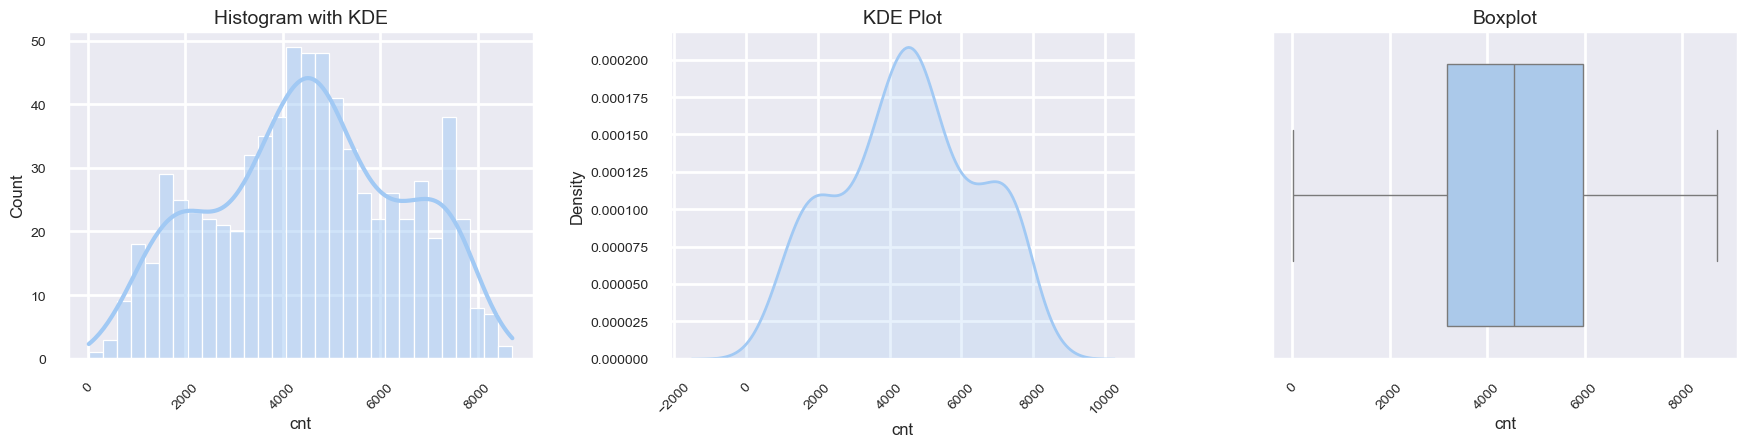

In [620]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
axes = axes.flatten() 

plots = [
    lambda ax: sns.histplot(data=df, x='cnt', bins=30, kde=True, ax=ax).set_title('Histogram with KDE'),
    lambda ax: sns.kdeplot(data=df, x='cnt', shade=True, ax=ax).set_title('KDE Plot'),
    lambda ax: sns.boxplot(data=df, x='cnt', ax=ax).set_title('Boxplot')
]

for i, plot in enumerate(plots):
    axes[i].tick_params(axis='x', rotation=45)
    plot(axes[i]) 

for j in range(len(plots), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Looking into the KDE plot the target variable 'cnt' is normally distributed.
#-------------------

- Visualize distributions of key categorical features. (discrete independent categorical variables)

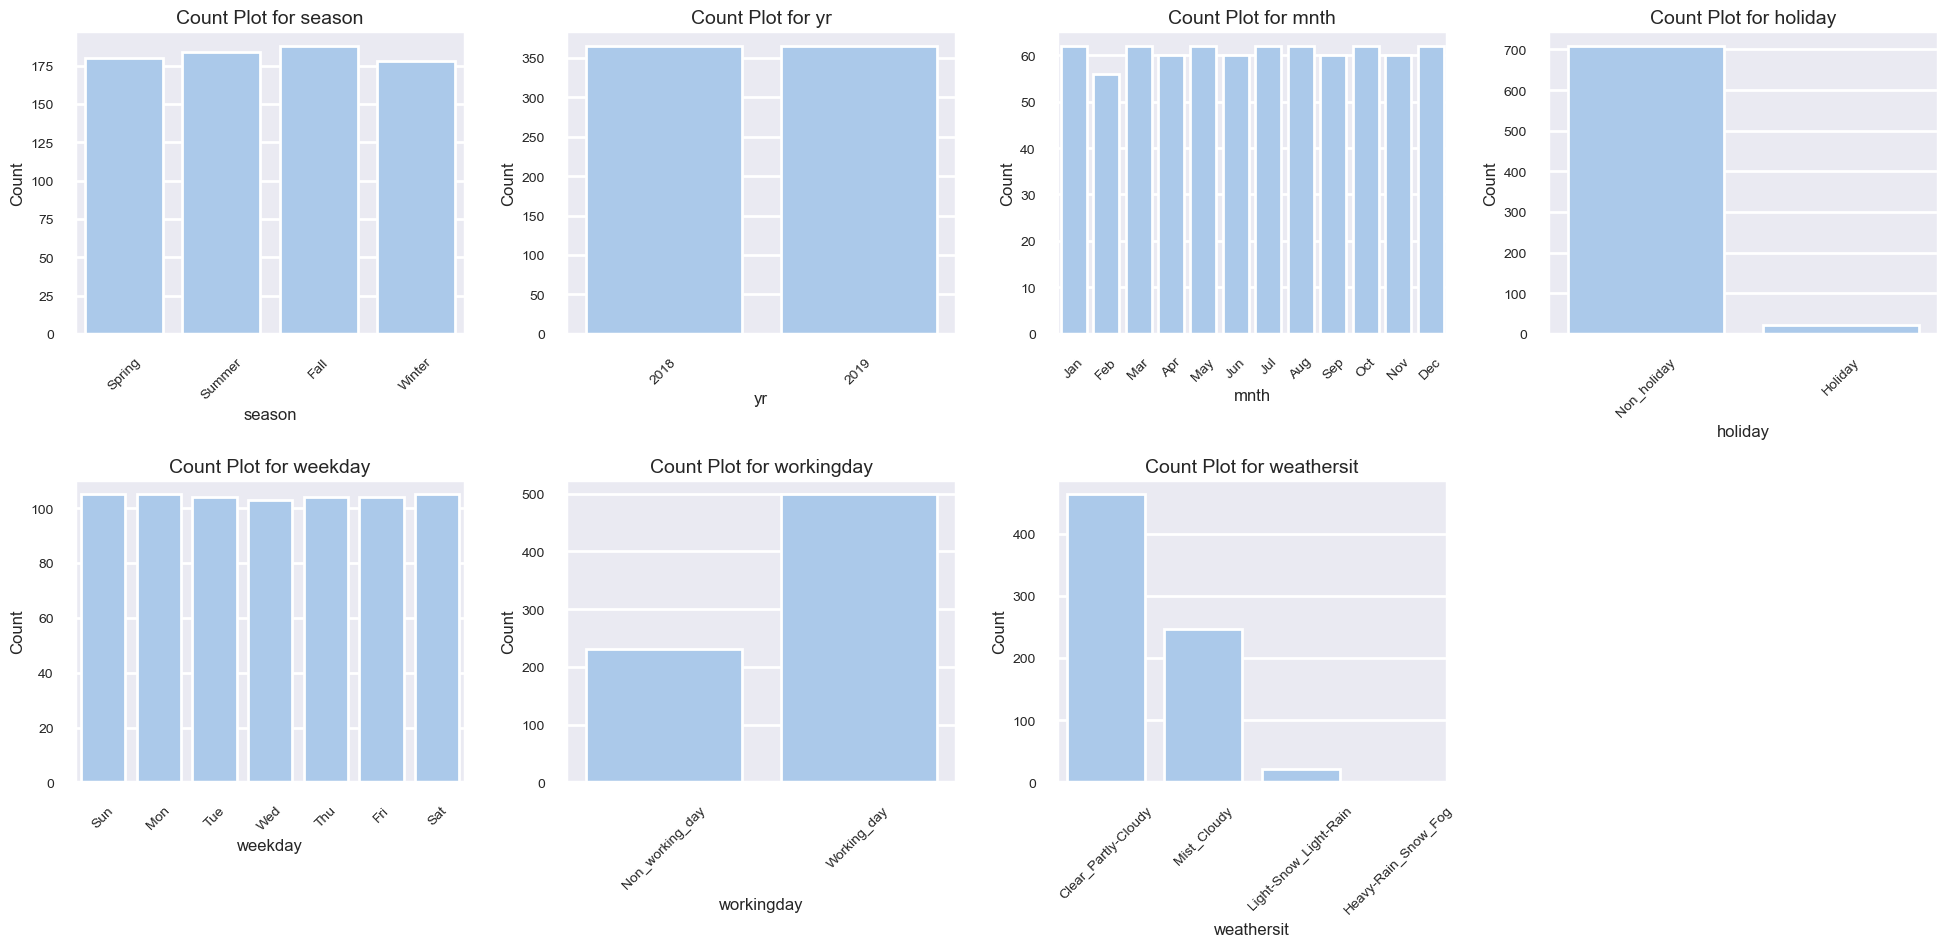

In [621]:
cat_rows = (len(cat_columns) + 3) // 4
fig, axes = plt.subplots(cat_rows, 4, figsize=(20, 5 * cat_rows))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(cat_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Independent variables ['holiday', 'workingday', 'weathersit'] has visible impact on the data
#-------------------

- Visualize distributions of key numerical features. (continuous independent variables)

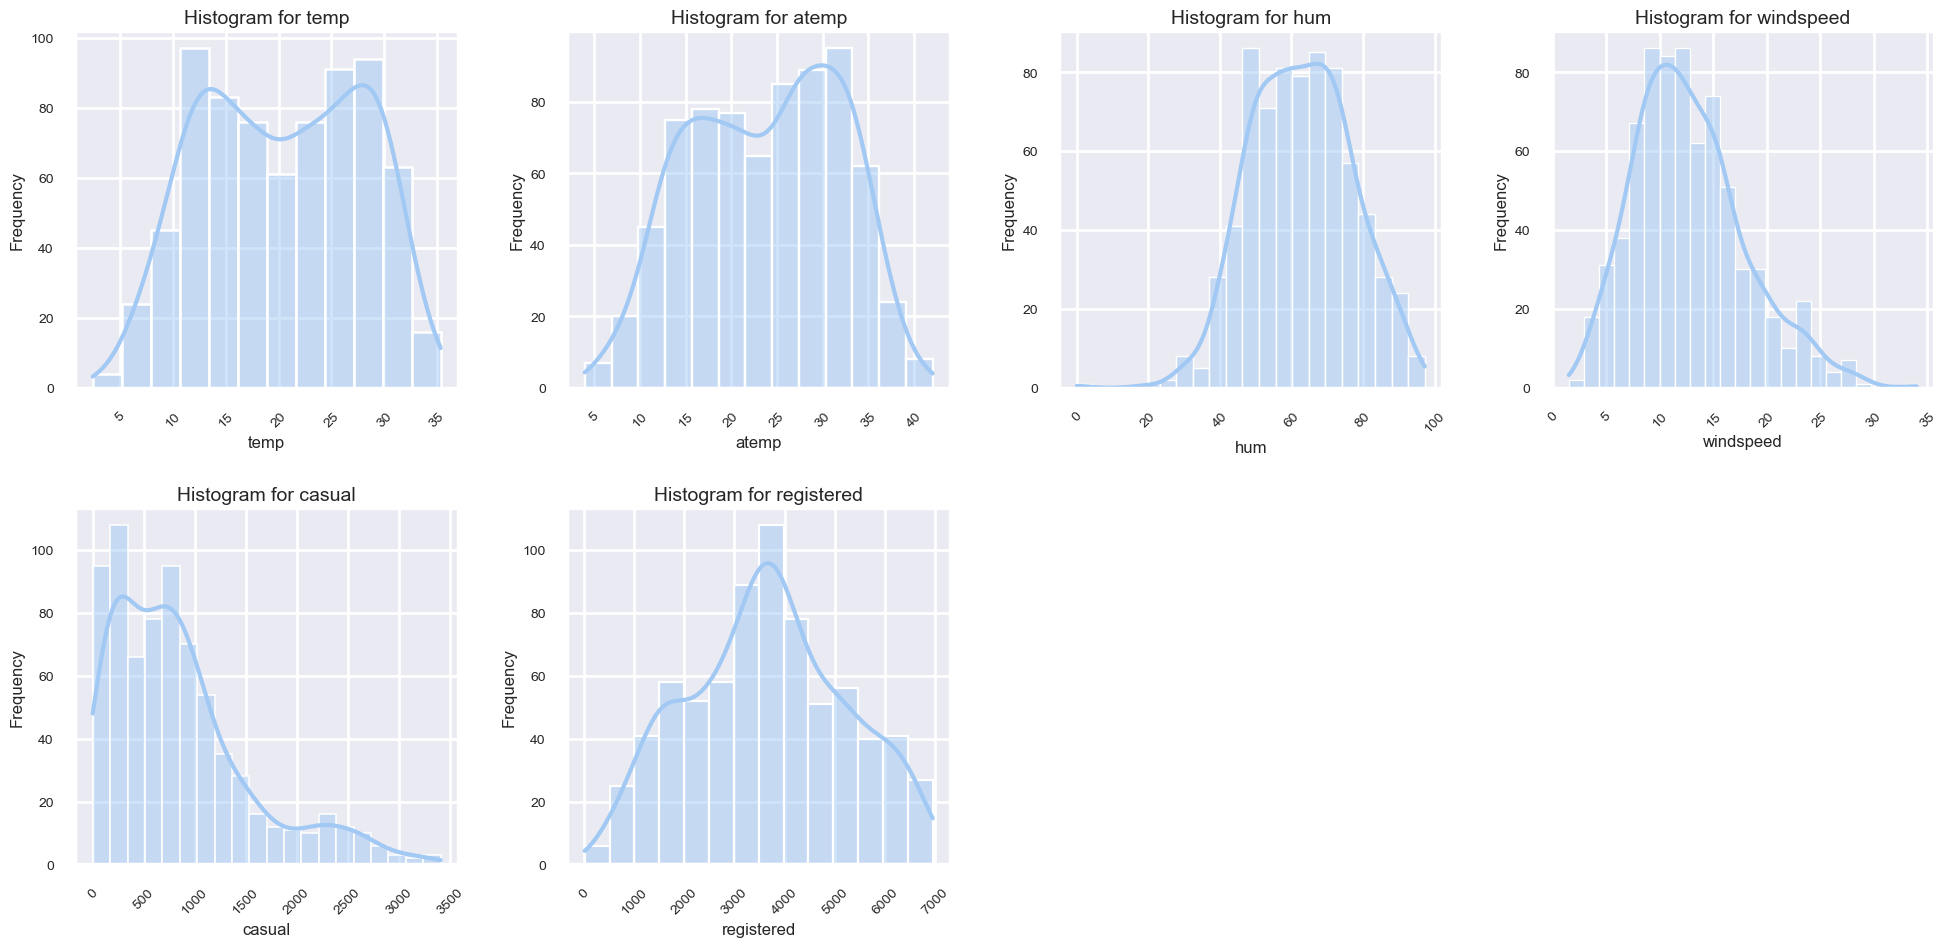

In [622]:
num_rows = (len(num_columns) + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. 'registered' has a distribution similar to the target variable 'cnt'
#-------------------

### **4.2. Bivariate Analysis**
- Examine relationships between the target variable (`cnt`) and independent numeric variables.

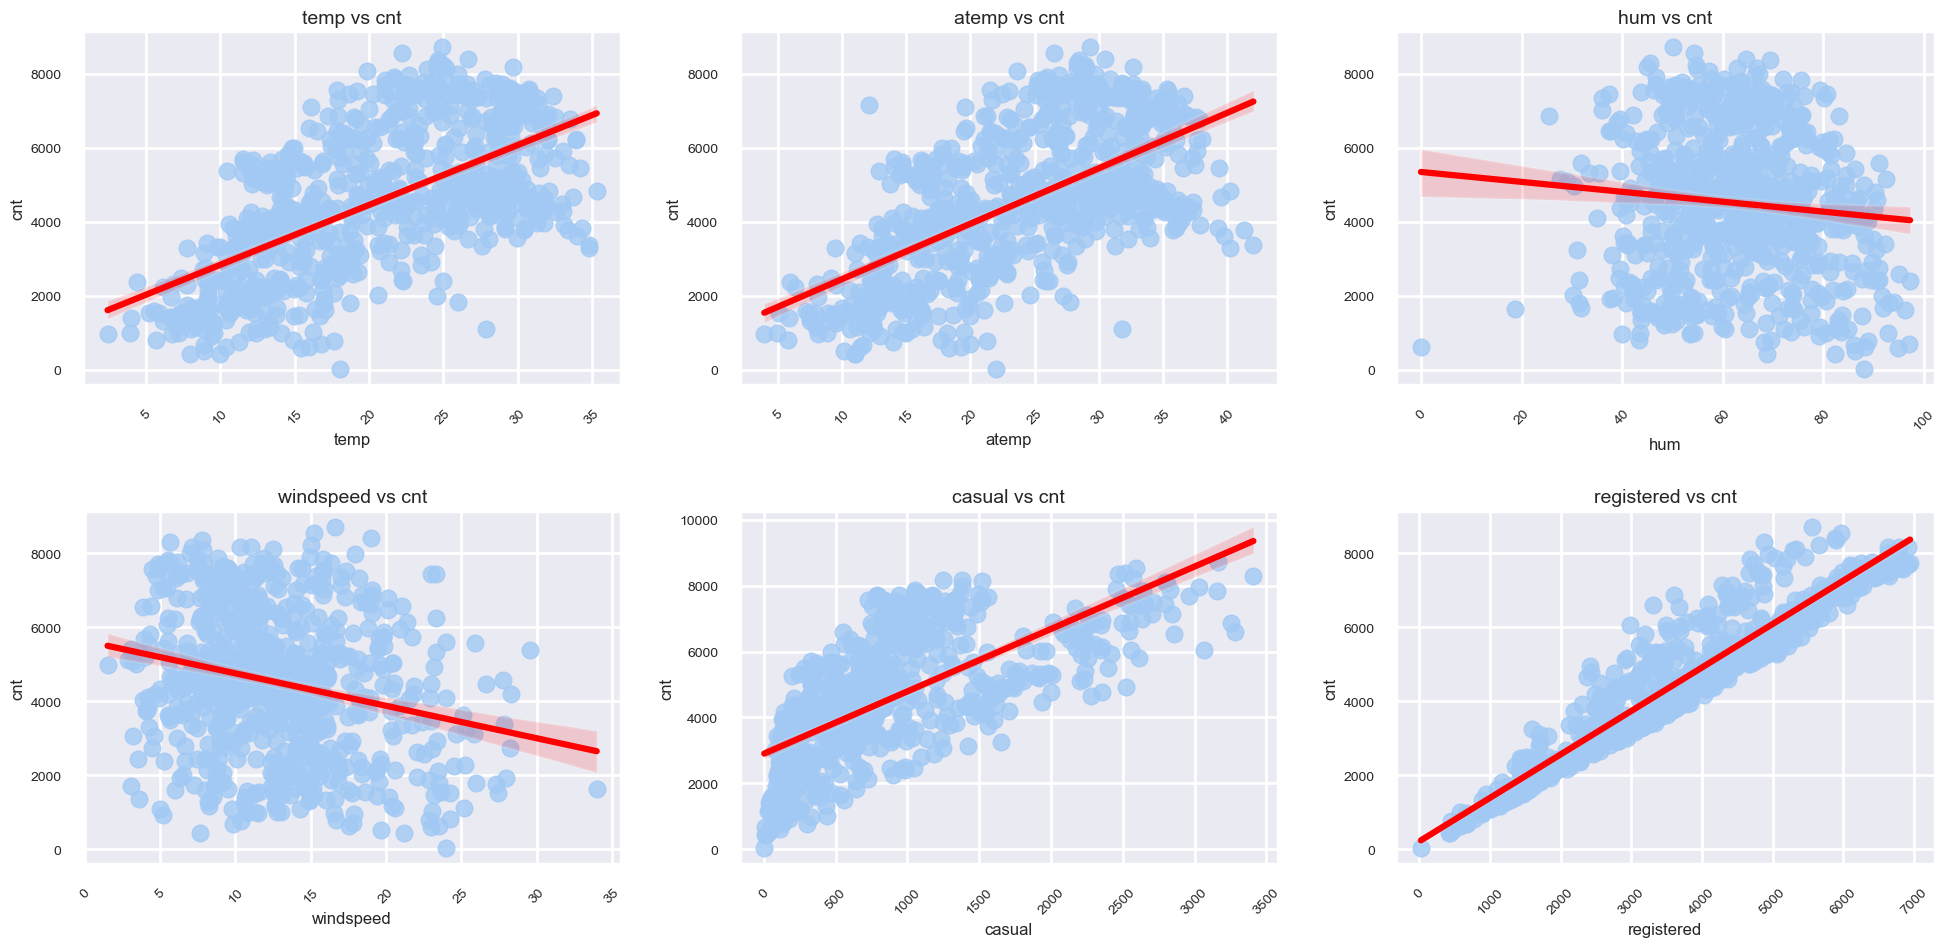

In [623]:
num_rows = (len(num_columns) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_columns): 
    sns.regplot(data=df, x=col, y='cnt', ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs cnt')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cnt')
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra axes
for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. 4 out of 6 continuous independed variables are directly proportional
# 2. The rest are inversely proportional ie., when ['hum', 'windspeed'] increases, there's less demand for the bikes
#-------------------

- Examine relationships between the target variable (`cnt`) and independent categorical variables.

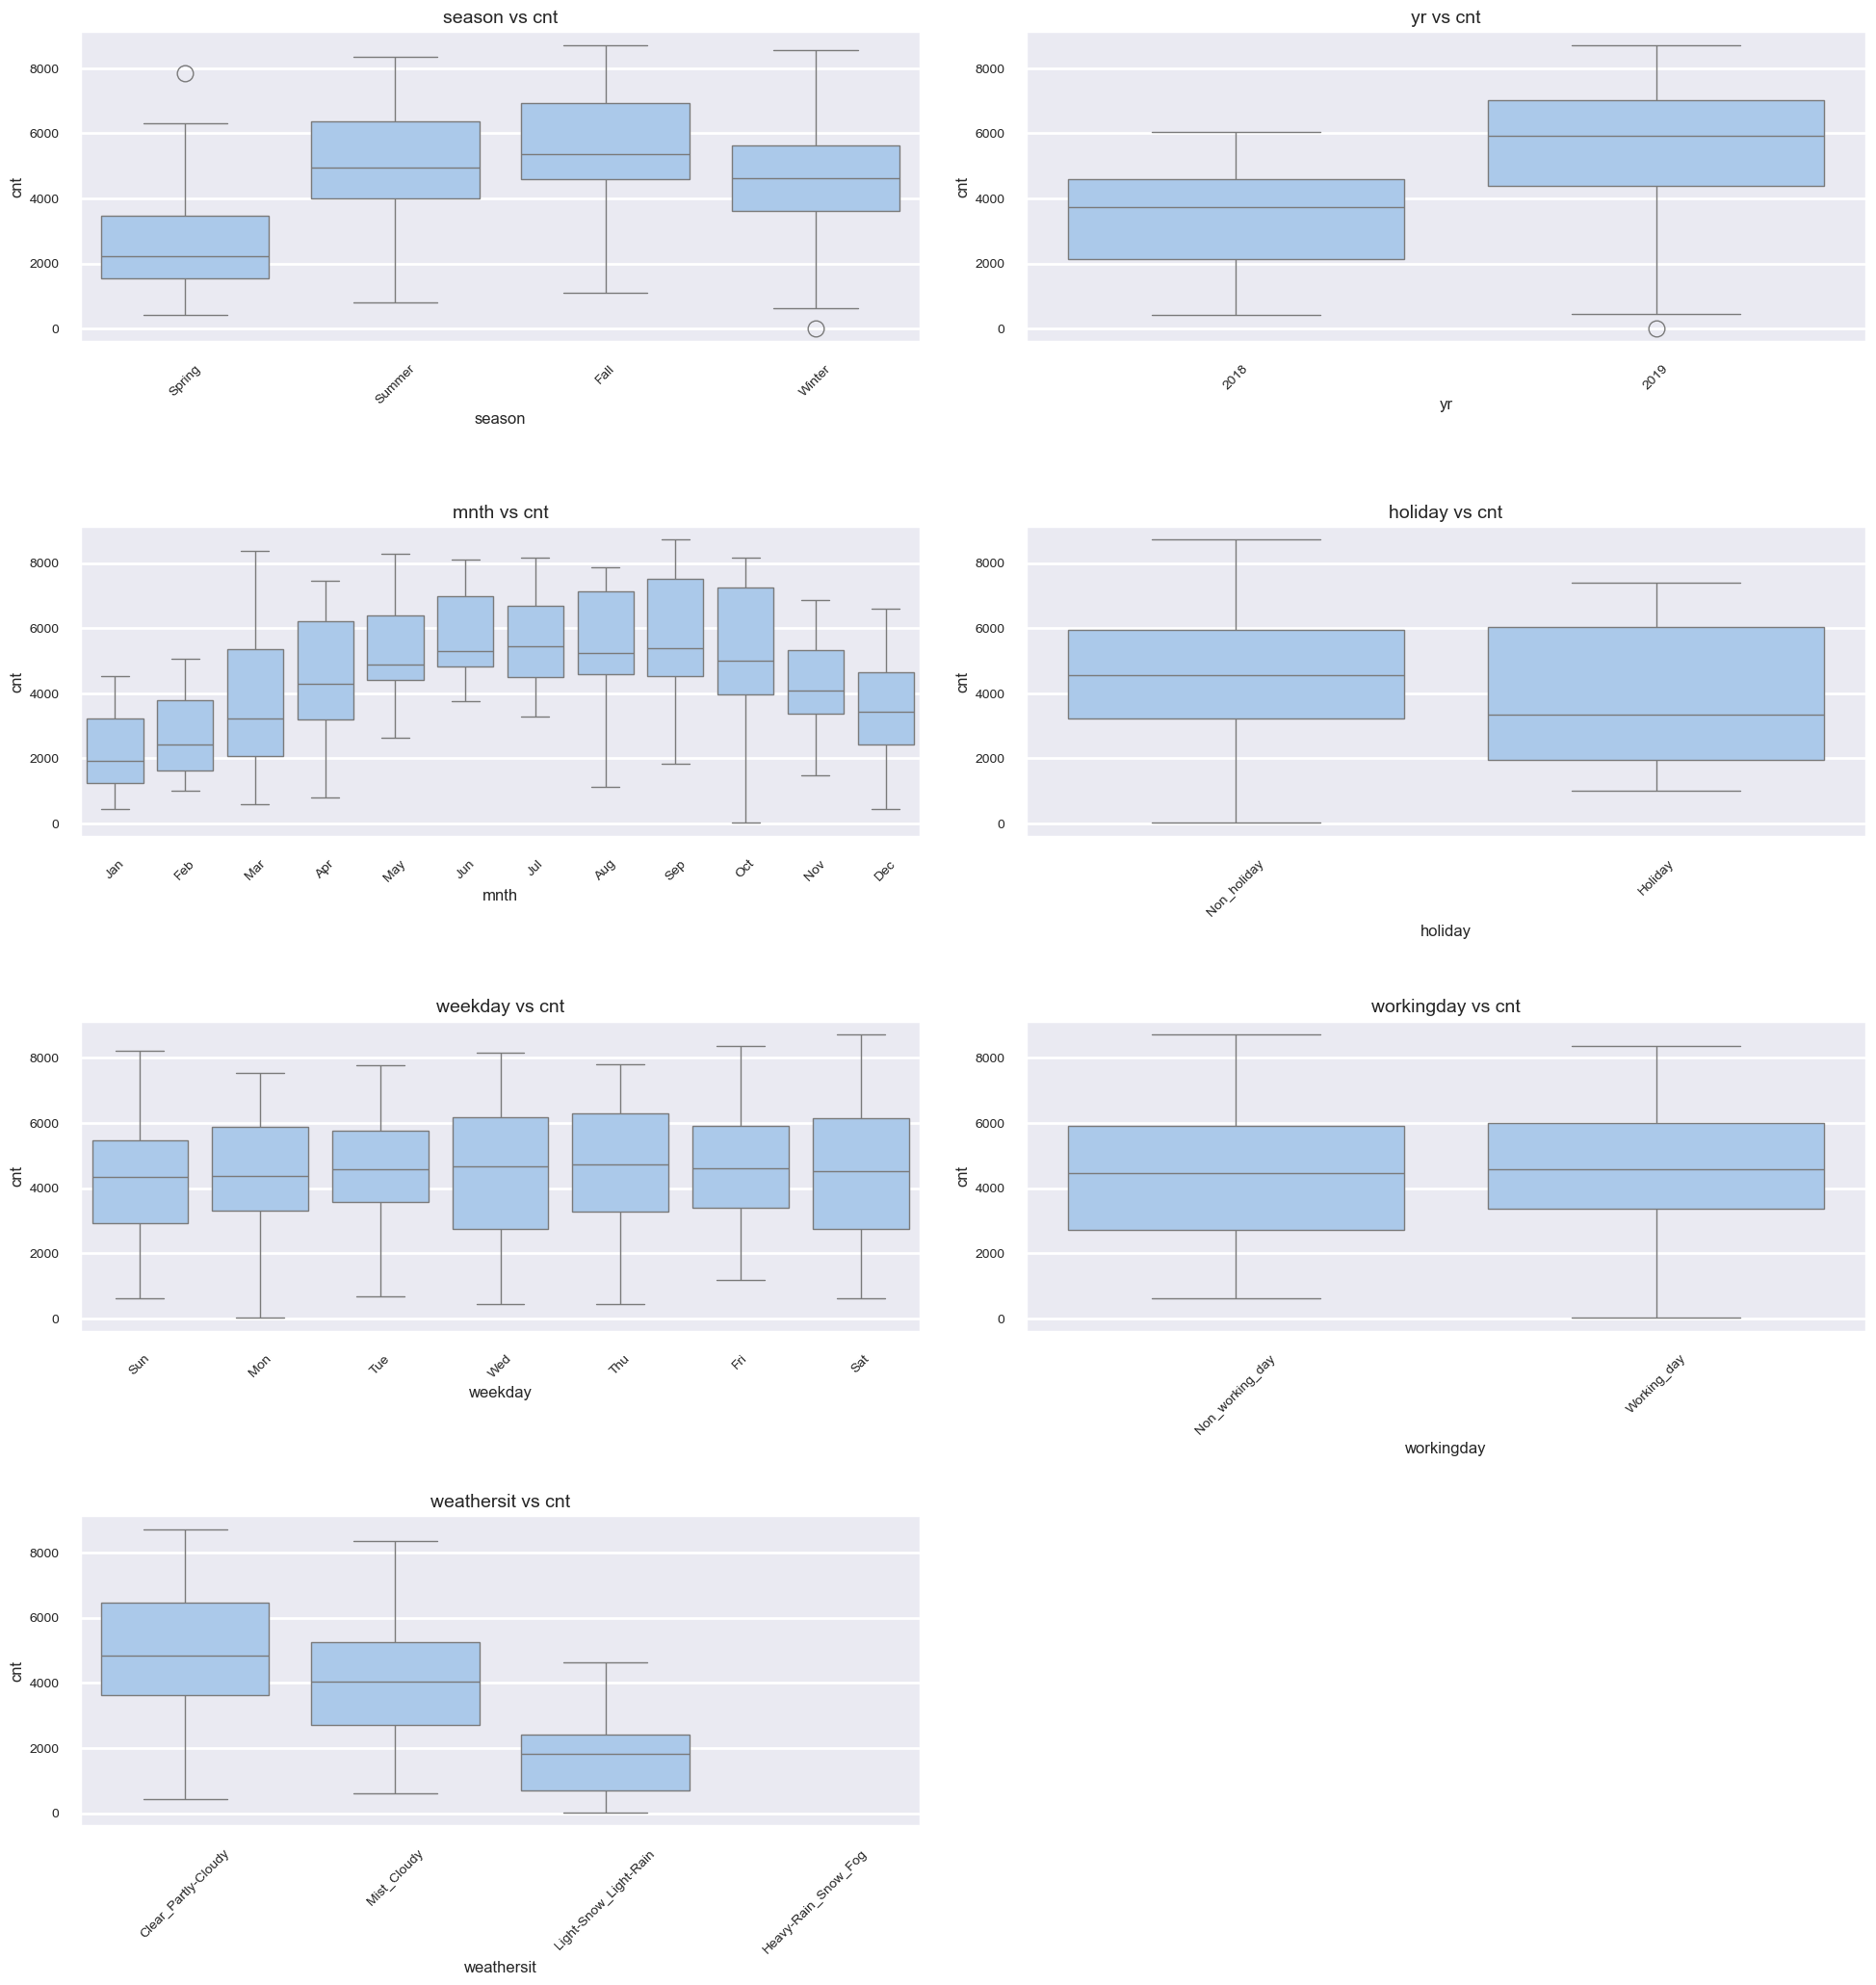

In [624]:
fig, axes = plt.subplots(len(cat_columns), 2, figsize=(20, 5 * len(cat_columns)))
axes = axes.flatten()
num_column_to_compare = 'cnt'

for i, col in enumerate(cat_columns):
    sns.boxplot(data=df, x=col, y=num_column_to_compare, ax=axes[i])
    axes[i].set_title(f'{col} vs {num_column_to_compare}')
    axes[i].set_xlabel(col)    
    axes[i].set_ylabel(num_column_to_compare)
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(cat_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Maximum demand is in fall season
# 2. Demand in 2019 is more than 2018 which shows growth in the demand
# 3. As expected weather situation plays a major role in the demand. During rainy or snow season the demand is at the lowest.
#-------------------

### **4.3. Correlation Analysis**
- Create a heatmap to identify correlated variables.

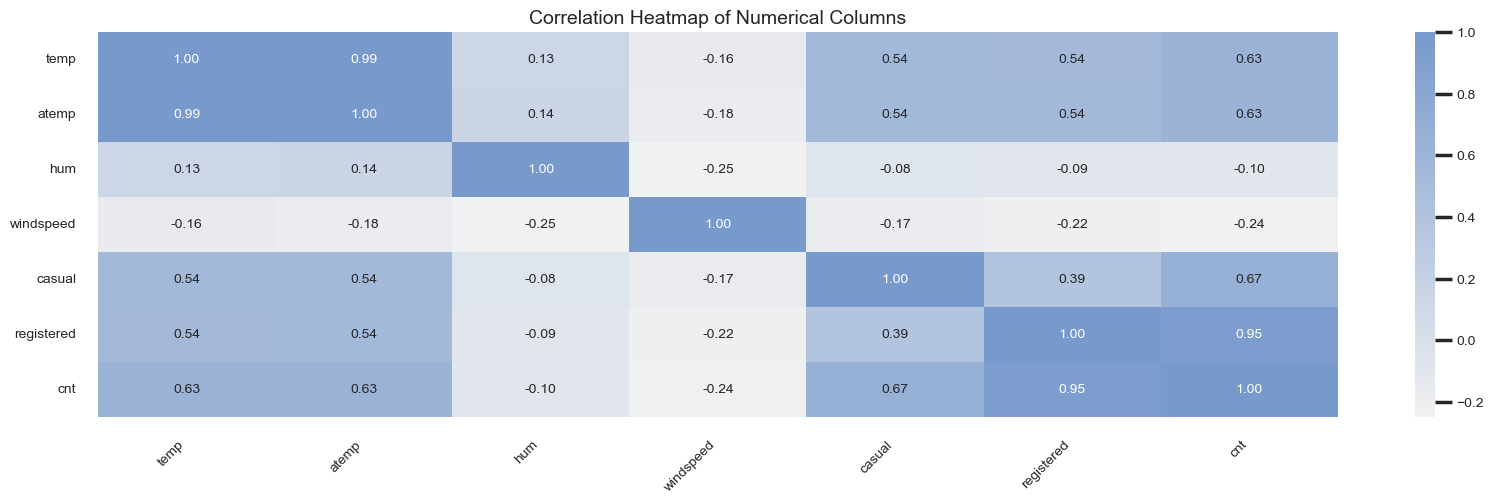

In [625]:
plt.figure(figsize=(20, 5))
correlation = df[num_columns + target_columns].corr()
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 10}, cmap=sns.light_palette("#79c", as_cmap=True), fmt='.2f')

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Quick observation
#-------------------
# 1. 'cnt' is highly co-related with 'registered' customers
# 2. There's a decent co-relation between temperature and the demand
# 3. As noticed in previous analysis results, the humidity and windspeed has negative co-relation with the demand
#-------------------

In [626]:
# The 'casual' and 'registered' variables can be dropped as it is duplicating to the target variable and may affect the r2 calculation
df = df.drop(['casual', 'registered'], axis=1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

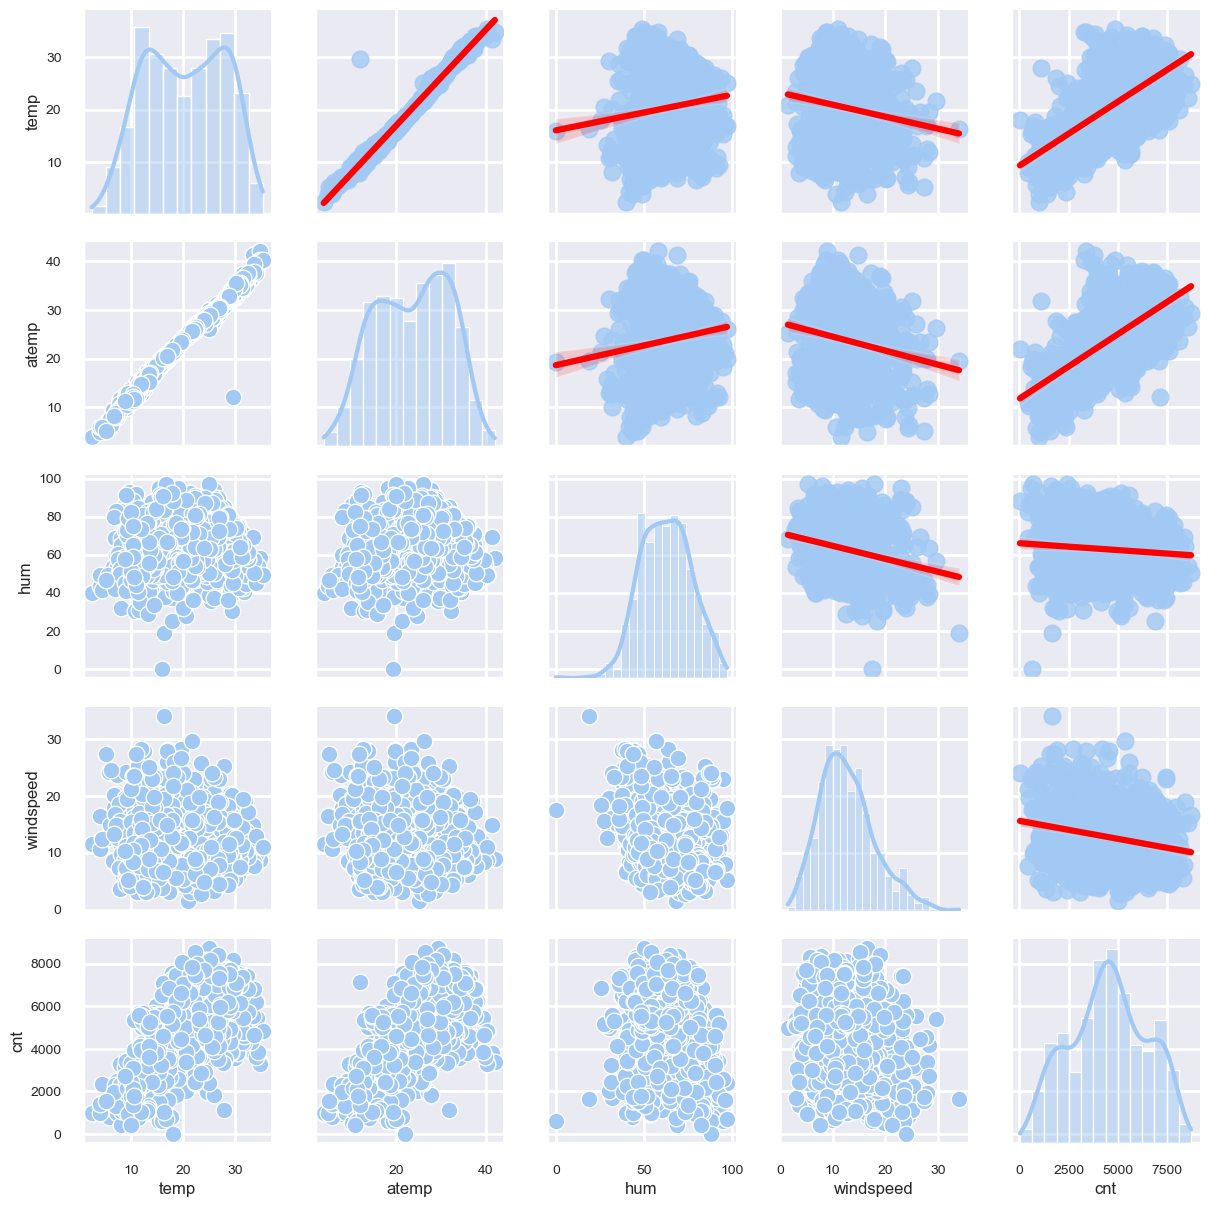

In [627]:
g = sns.PairGrid(df)
g.map_upper(sns.regplot, line_kws={'color': 'red'})
g.map_lower(sns.scatterplot) 
g.map_diag(sns.histplot, kde=True) 
plt.show()

# Quick observation
#-------------------
# 1. Looking into the below graph, it's not a single or simple linear model, the target variable is impacted by multiple dependant variables
#-------------------

## **5. Data Preparation for Modeling**

### **5.1. Feature Engineering**

 - The target variable is dependent on multiple variables
 - The target variable is a continuous variable
 - We will use multiple linear regression model to solve the situation

### **5.2. Encoding Categorical Variables**
- Convert categorical variables into dummy/indicator variables.

In [628]:
# Reverse mapping to encode the data
dict_yr_reverse = {v: k for k, v in dict_yr.items()}
dict_holiday_reverse = {v: k for k, v in dict_holiday.items()}
dict_workingday_reverse = {v: k for k, v in dict_workingday.items()}

df['yr'] = df['yr'].map(dict_yr_reverse)
df['holiday'] = df['holiday'].map(dict_holiday_reverse)
df['workingday'] = df['workingday'].map(dict_workingday_reverse)

df.shape

(730, 12)

In [629]:
season = pd.get_dummies(df['season'], dtype='int', drop_first=True)
mnth = pd.get_dummies(df['mnth'], dtype='int', drop_first=True)
weekday = pd.get_dummies(df['weekday'], dtype='int', drop_first=True)
weathersit = pd.get_dummies(df['weathersit'], dtype='int', drop_first=True)

In [630]:
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

In [631]:
df = pd.concat([df, season, mnth, weekday, weathersit], axis=1)

In [632]:
print(df.shape)
print(df.columns)

(730, 31)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Mist_Cloudy', 'Light-Snow_Light-Rain',
       'Heavy-Rain_Snow_Fog'],
      dtype='object')


### **5.3. Splitting the Dataset**
- Split the data into training and testing sets.

In [633]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


- Rescaling the Features (Min-Max Scaling or Standardization)
    - Min-Max Scaling formula: (x - min(x)) / max(x) - min(x) The result will be between 0 and 1
    - Standardization Scaling formula: (x - mean(x)) / standard-deviation(x) The result mean will be 0 and sigma (standard deviation) 1

In [634]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist_Cloudy,Light-Snow_Light-Rain,Heavy-Rain_Snow_Fog
576,1,0,1,29.25,33.14,70.42,11.08,7216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,16.98,20.67,62.12,10.79,4066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.49,11.59,48.33,23.50,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.44,18.88,48.96,8.71,4220,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
111,0,0,1,13.80,16.10,72.96,14.71,1683,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [635]:
# Create an object of type MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

df_train.describe()

,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist_Cloudy,Light-Snow_Light-Rain,Heavy-Rain_Snow_Fog
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.54,0.51,0.65,0.32,0.51,0.25,0.26,0.25,0.07,0.10,0.08,0.08,0.08,0.08,0.10,0.08,0.08,0.09,0.08,0.15,0.13,0.16,0.13,0.13,0.15,0.35,0.03,0.00
std,0.23,0.21,0.15,0.17,0.22,0.43,0.44,0.43,0.25,0.30,0.27,0.28,0.27,0.27,0.29,0.27,0.28,0.28,0.28,0.36,0.34,0.37,0.34,0.33,0.36,0.48,0.17,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.34,0.33,0.54,0.20,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.54,0.53,0.65,0.30,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.74,0.69,0.75,0.41,0.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## **6. Training the Model**

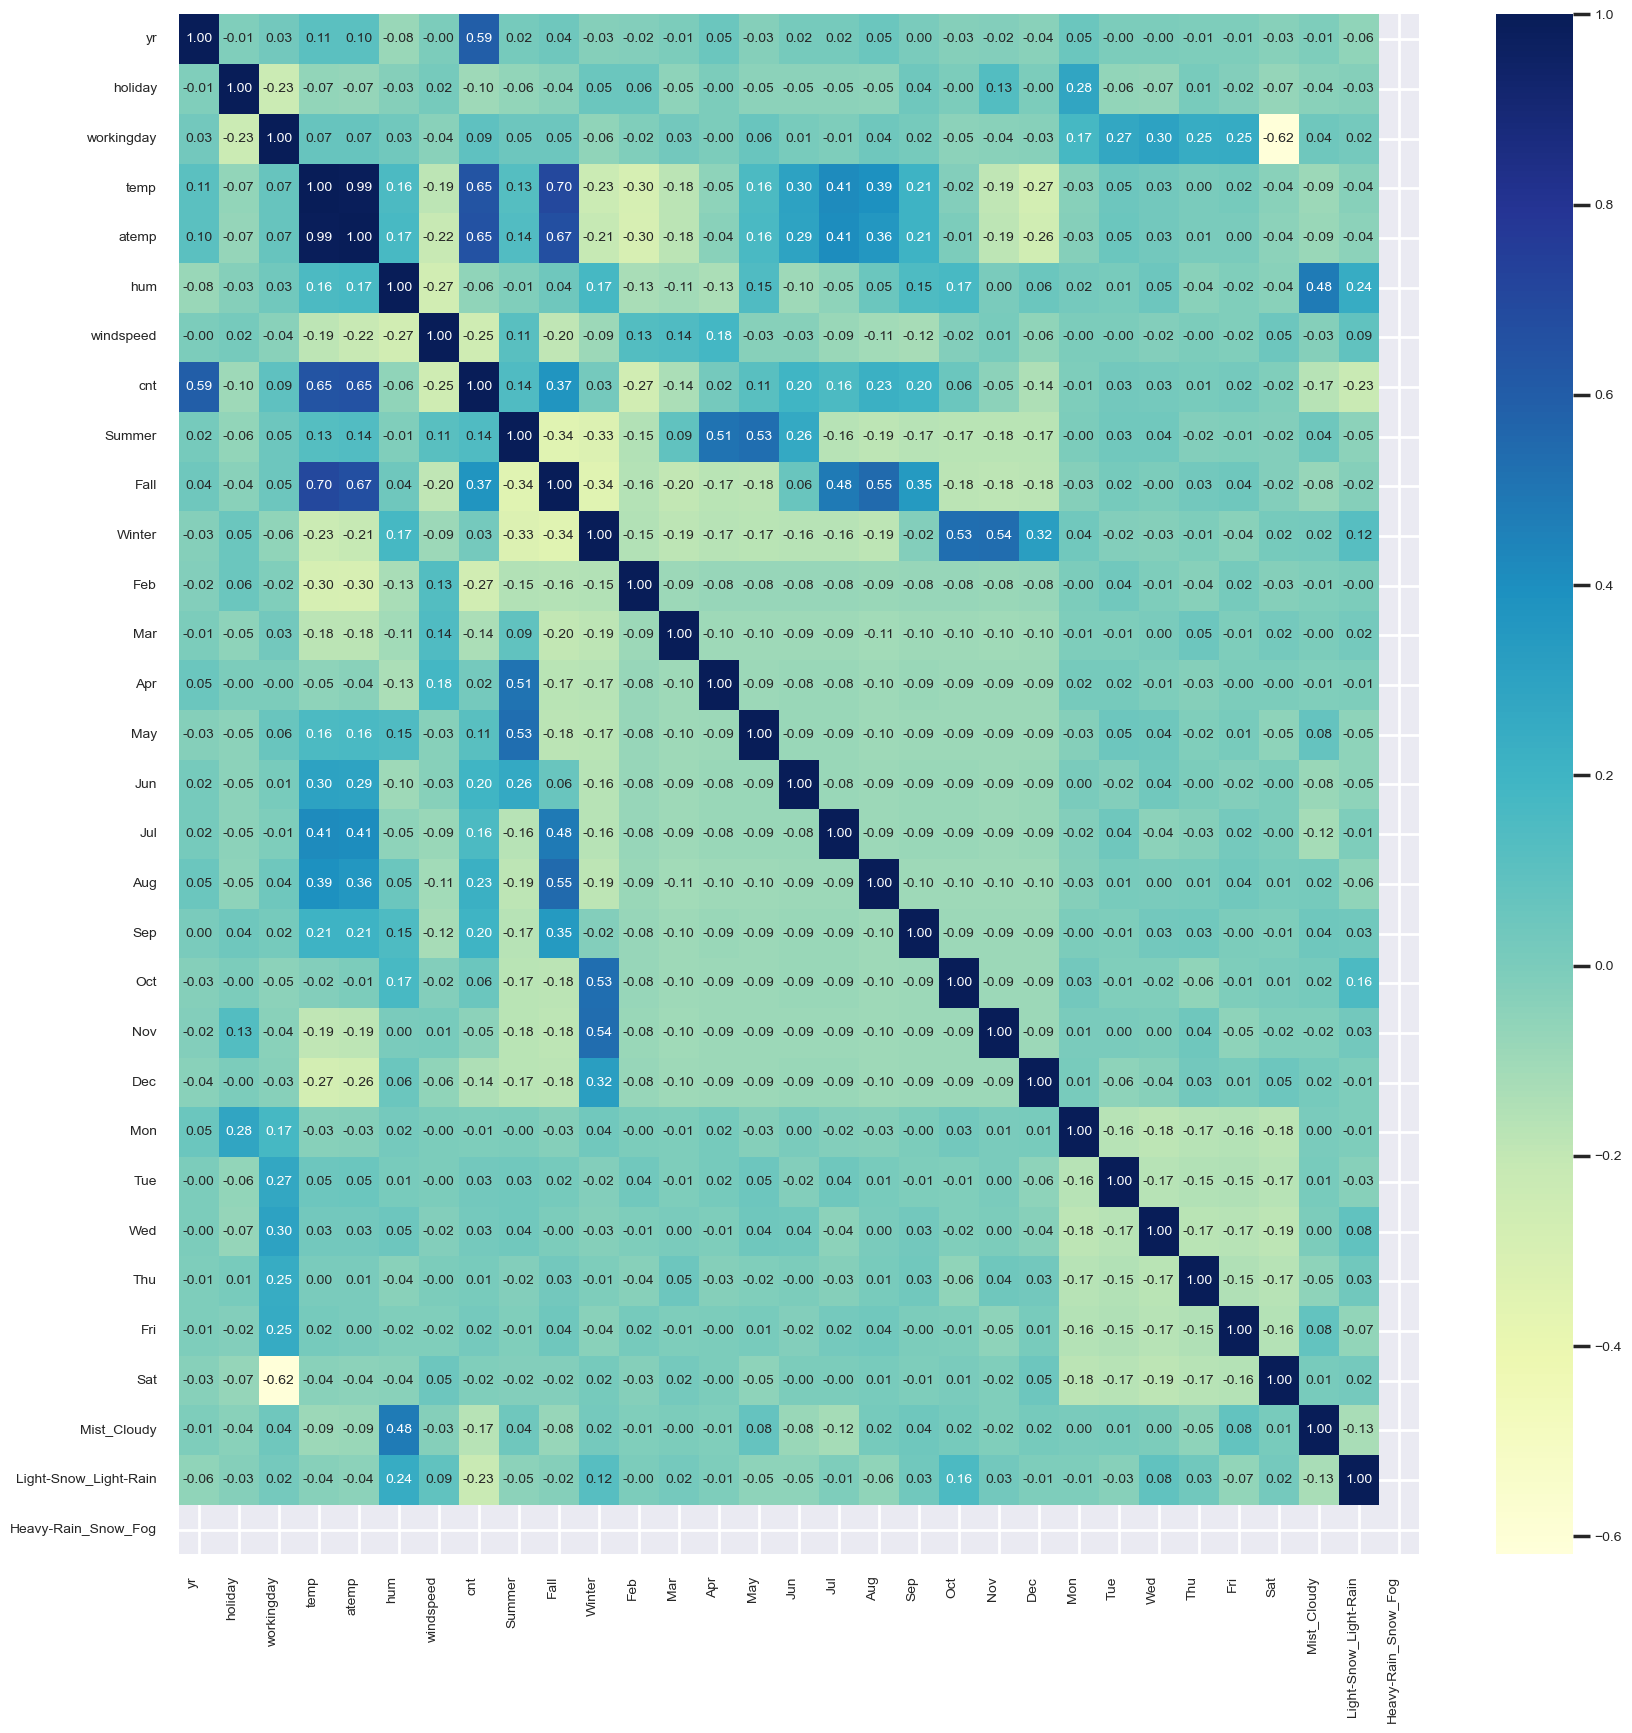

In [636]:
plt.figure(figsize=(20, 20))
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 10}, cmap="YlGnBu", fmt='.2f')

plt.xticks(fontsize=10, rotation=90, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.show()

In [637]:
# Get the target variable in y_train and the rest of the variables in X_train
y_train = df_train.pop('cnt')
X_train = df_train

### **6.1. Hypothesis Testing and Regression Result Analysis**

In [638]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Fall,Winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist_Cloudy,Light-Snow_Light-Rain,Heavy-Rain_Snow_Fog
576,1,0,1,0.82,0.77,0.73,0.26,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.44,0.44,0.64,0.26,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.25,0.20,0.50,0.66,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.40,0.39,0.50,0.19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
111,0,0,1,0.35,0.32,0.75,0.38,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


Let us start the linear regression on 'atemp' variable against 'cnt' target variable.

The null hypotheis in our case is:
 - The coefficient of atemp (Beta1) is 0. ie., There is no relationship between atemp and cnt. 
   - y = Beta0 + (X * Beta1)
   - y = Beta0 + (X * 0) = Beta0
 - The above equation states, increasing X value has no effect on y

Alternative hypothesis is:
 - The coefficient of atemp (Beta1) is not 0

Significance level:
 - Usual value of the significance level (alpha) is 0.05
   - p-value < alpha: Reject the null hypothesis
   - p-value >= alpha: Fail to reject the null hypothesis

In [ ]:
# Constrant is the intercept of the bestfit line in y-axis. ie., in the equation of line y = mx + b, b is the constant intercept. y = b0 + b1X
# By default the training set doesn't come with the constant. The training set assumes the starting point is 0.
X_train_sm = sm.add_constant(X_train['atemp'])

# Ordinary Least Squares regression is a method used to find the best fit line
# The best fit line describes the relationship between independent variables and hte target variable
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

# Quick observation
#-------------------
# 1. The first linear model is created. The intercept b0 = 0.16 and slope b1 = 0.68
# 2. The equation of the best fit line can be written as y = 0.16 + 0.68X
#-------------------

const   0.16
atemp   0.68
dtype: float64

In [640]:
lr_model.summary()

# Quick observation
#-------------------
# 1. The coefficient of the continous variable 'atemp' is 0.68
# 2. The p-value of 0 < (alpha 0.05 significance level). Hence the null hypothesis is rejected.
# 3. Low p-value suggests the continuous independent variable atemp is statistically significant
# 4. Looking at the value of R-squared 0.420, we learn that, about 42% of the variance in cnt (demand) can explained by the variable atemp
#-------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           4.77e-62
Time:                        21:33:15   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [643]:
X_train_sm = X_train[['atemp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.98e-132
Time:                        21:58:16   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.000       0.042       0.101
atemp          0.6259      0.026     24.092      0.000       0.575       0.677
yr             0.2373      0.011     21.524      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **7. Residual Analysis**

## **8. Predictions and Evaluation**